In [1]:
import logging
import numpy as np
import pandas as pd
root = logging.getLogger()
root.addHandler(logging.StreamHandler())
%matplotlib inline

In [2]:
# download http://bit.ly/1R8pt20 (zipped Turtles shapefiles), and unzip them
from iSDM.species import IUCNSpecies
fish = IUCNSpecies(name_species='All')
fish.load_shapefile('../data/fish/FW_FISH.shp') # warning, 2GB of data will be loaded, may take a while!!

Loading data from: ../data/fish/FW_FISH.shp
The shapefile contains data on 12927 species.


## Simple data exploration

In [3]:
fish.get_data().columns

Index(['binomial', 'category', 'citation', 'class_name', 'compiler',
       'dist_comm', 'family_nam', 'genus_name', 'geometry', 'id_no', 'island',
       'kingdom_na', 'legend', 'order_name', 'origin', 'phylum_nam',
       'presence', 'seasonal', 'shape_area', 'shape_leng', 'source',
       'species_na', 'subpop', 'subspecies', 'tax_comm', 'year'],
      dtype='object')

How many unique binomials are there?

In [4]:
fish_data = fish.get_data()
fish_data['binomial'].unique().size 

6328

Get their names in an array:

In [5]:
unique_binomials = fish_data['binomial'].unique()
unique_binomials

array(['Bagarius suchus', 'Rasbora spilocerca', 'Notoglanidium pallidum',
       ..., 'Schistura procera', 'Monotrete cambodgiensis',
       'Acantopsis spectabilis'], dtype=object)

In [6]:
fish_data.head(10) # peak at the first 10 records

,binomial,category,citation,class_name,compiler,dist_comm,family_nam,genus_name,geometry,id_no,...,presence,seasonal,shape_area,shape_leng,source,species_na,subpop,subspecies,tax_comm,year
0,Bagarius suchus,NT,"Indo-Burma freshwater assessment, IUCN",ACTINOPTERYGII,IUCN FBU,None,SISORIDAE,Bagarius,"POLYGON ((101.8125000000001 22.48333333300008,...",181271.0,...,2.0,5.0,49.374794,60.288418,Red List assessment,suchus,None,None,None,2012.0
1,Rasbora spilocerca,LC,"Indo-Burma freshwater assessment, IUCN",ACTINOPTERYGII,"J. Scott, IUCN",None,CYPRINIDAE,Rasbora,"POLYGON ((103.5121466740001 18.53992445200004,...",181127.0,...,2.0,5.0,8.361239,58.345301,Red List assessment,spilocerca,None,None,None,2012.0
2,Notoglanidium pallidum,VU,IUCN (International Union for Conservation of ...,ACTINOPTERYGII,None,None,CLAROTEIDAE,Notoglanidium,POLYGON ((12.81128506100004 -4.286932711999953...,182359.0,...,1.0,1.0,1.524058,10.000992,None,pallidum,None,None,None,0.0
3,Parananochromis brevirostris,VU,IUCN (International Union for Conservation of ...,ACTINOPTERYGII,None,None,CICHLIDAE,Parananochromis,(POLYGON ((12.10738288000005 1.628413222000063...,182240.0,...,2.0,1.0,5.563441,30.269691,None,brevirostris,None,None,None,0.0
4,Parananochromis brevirostris,VU,IUCN (International Union for Conservation of ...,ACTINOPTERYGII,None,None,CICHLIDAE,Parananochromis,(POLYGON ((12.78953162300007 2.117309570000032...,182240.0,...,1.0,1.0,4.872947,39.634665,None,brevirostris,None,None,None,0.0
5,Parananochromis brevirostris,VU,None,ACTINOPTERYGII,None,None,CICHLIDAE,Parananochromis,(POLYGON ((13.13924221400003 -0.98298000799997...,182240.0,...,1.0,1.0,0.366030,6.770438,None,brevirostris,None,None,None,0.0
6,Ambassis vachellii,LC,H.Larson and IUCN (International Union for Con...,ACTINOPTERYGII,M.Raiwalui/IUCN,None,AMBASSIDAE,Ambassis,"(POLYGON ((105.2625 -6.754166666999936, 105.25...",166893.0,...,1.0,1.0,121.742461,1817.507950,H.Larson,vachellii,None,None,None,2011.0
7,Parasikukia maculata,LC,"Indo-Burma freshwater assessment, IUCN",ACTINOPTERYGII,"D. Allen, IUCN",None,CYPRINIDAE,Parasikukia,"(POLYGON ((100.374432712 18.59657999700005, 10...",181017.0,...,2.0,1.0,12.017594,58.052434,Red List assessment,maculata,None,None,None,2012.0
8,Parasikukia maculata,LC,"Indo-Burma freshwater assessment, IUCN",ACTINOPTERYGII,"D. Allen, IUCN",None,CYPRINIDAE,Parasikukia,(POLYGON ((100.8458333330001 12.69166666700005...,181017.0,...,2.0,1.0,4.081329,37.348873,C. Vidthayanon pers. comm. 2011,maculata,None,None,None,2012.0
9,Parasikukia maculata,LC,"Indo-Burma freshwater assessment, IUCN",ACTINOPTERYGII,IUCN FBU,None,CYPRINIDAE,Parasikukia,(POLYGON ((99.65793745300005 16.53653225300008...,181017.0,...,2.0,5.0,0.374677,6.355700,Red List assessment,maculata,None,None,None,2012.0


Sort them by their "shape_area" column, to get the biggest and smallest areas

In [7]:
fish_data.sort(columns='shape_area', inplace=True)

/home/daniela/anaconda/envs/biodiversity_py3/lib/python3.4/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


Peak at the first 5 records with the smallest area

In [8]:
fish_data.head(5)

,binomial,category,citation,class_name,compiler,dist_comm,family_nam,genus_name,geometry,id_no,...,presence,seasonal,shape_area,shape_leng,source,species_na,subpop,subspecies,tax_comm,year
1396,Astatotilapia burtoni,LC,IUCN (International Union for Conservation of ...,ACTINOPTERYGII,None,None,CICHLIDAE,Astatotilapia,POLYGON ((29.81538226200007 -5.175785492999978...,60462.0,...,1.0,0.0,0.000122,0.060842,None,burtoni,None,None,None,0.0
6610,Channa striata,LC,"Chaudhry S., 2009",ACTINOPTERYGII,Shivaji Chaudhry,None,CHANNIDAE,Channa,"POLYGON ((121.2046038030001 14.44001242700006,...",166563.0,...,1.0,4.0,0.000242,0.073176,CAS 204572,striata,None,None,None,2007.0
6889,Rasbora rasbora,LC,IUCN,ACTINOPTERYGII,W. Vishwanath,None,CYPRINIDAE,Rasbora,"POLYGON ((97.65833333300009 16.53333333300003,...",166440.0,...,1.0,1.0,0.000286,0.075311,"Fishbase, 2026",rasbora,None,None,None,2007.0
11988,Puntius chola,LC,"Dahanukar, N.",ACTINOPTERYGII,"Dahanukar, N.",None,CYPRINIDAE,Puntius,"POLYGON ((97.65833333300009 16.53333333300003,...",166443.0,...,1.0,1.0,0.000286,0.075311,"accessed through GBIF data portal, NRM-Fishes,...",chola,None,None,None,2007.0
5382,Pisodonophis boro,LC,"Chaudhry S., 2009",ACTINOPTERYGII,Shivaji Chaudhry,None,OPHICHTHIDAE,Pisodonophis,"POLYGON ((85.46407583500007 19.66257255000005,...",166552.0,...,1.0,4.0,0.000393,0.101212,FISH 387621,boro,None,None,None,2007.0


The last 5 records (biggest area)

In [9]:
fish_data.tail(5)

,binomial,category,citation,class_name,compiler,dist_comm,family_nam,genus_name,geometry,id_no,...,presence,seasonal,shape_area,shape_leng,source,species_na,subpop,subspecies,tax_comm,year
10436,Rutilus rutilus,LC,None,ACTINOPTERYGII,None,None,CYPRINIDAE,Rutilus,(POLYGON ((-4.770833332999928 48.5250000000000...,19787.0,...,1.0,1.0,2987.465593,1978.210580,None,rutilus,None,None,None,0.0
271,Cottus confusus,LC,"Freshwater Biodiversity Unit, IUCN",ACTINOPTERYGII,"Phillipa Palmeirin, FBU, IUCN",None,COTTIDAE,Cottus,"(POLYGON ((-167.666666666 65.79166666700007, -...",202659.0,...,2.0,1.0,3031.001694,5133.731779,"Page, L.M. and Burr, B.M. 2011. Peterson Field...",confusus,None,None,None,2012.0
4886,Perca fluviatilis,LC,None,ACTINOPTERYGII,None,None,PERCIDAE,Perca,(POLYGON ((-4.770833332999928 48.5250000000000...,16580.0,...,1.0,1.0,3365.103170,2218.467787,None,fluviatilis,None,None,None,0.0
5973,Lota lota,LC,None,ACTINOPTERYGII,None,None,LOTIDAE,Lota,(POLYGON ((4.038374837000049 51.96308458100003...,135675.0,...,1.0,1.0,4264.651654,4250.283811,None,lota,None,None,None,0.0
10370,Esox lucius,LC,None,ACTINOPTERYGII,None,None,ESOCIDAE,Esox,(POLYGON ((-4.770833332999928 48.5250000000000...,135631.0,...,1.0,1.0,5225.451235,4405.111110,None,lucius,None,None,None,0.0


Decision: **"We will include all species except those that are completely extinct. For the (possibly) extant species, we will include their entire range (including polygons from which they are currently extinct) in order to cover their full potential distribution."**

From IUCN, these are the codes for presence:
1. Extant
2. Probably extant
3. Possibly extant
4. Possibly extinct
5. Extinct
6. Presence uncertain

Are there species for which the presence category isn't any of the above? (the "~" is negation, so this below says "select all fish data, for which the "presence" column is NOT in [1,2,3,4,5,6])

In [10]:
fish_data[~fish_data.presence.isin([1,2,3,4,5,6])]

,binomial,category,citation,class_name,compiler,dist_comm,family_nam,genus_name,geometry,id_no,...,presence,seasonal,shape_area,shape_leng,source,species_na,subpop,subspecies,tax_comm,year
3269,Acipenser fulvescens,LC,"Freshwater Biodiversity Unit, IUCN",ACTINOPTERYGII,IUCN,None,ACIPENSERIDAE,Acipenser,(POLYGON ((-77.20221048999997 44.0297339540000...,223.0,...,0.0,0.0,0.061229,5.069857,"Page and Burr, 1991",fulvescens,None,None,None,2013.0
2312,Sicyopterus sarasini,EN,None,ACTINOPTERYGII,None,None,GOBIIDAE,Sicyopterus,(POLYGON ((165.0041666660001 -21.3374999999999...,196370.0,...,0.0,0.0,0.299701,4.962775,None,sarasini,None,None,None,0.0
4669,Chanodichthys erythropterus,LC,None,ACTINOPTERYGII,None,None,CYPRINIDAE,Chanodichthys,"(POLYGON ((117.40221049 48.42859937900005, 117...",166143.0,...,0.0,0.0,0.822562,12.134009,None,erythropterus,None,None,None,0.0
11591,Hemiculter leucisculus,LC,None,ACTINOPTERYGII,None,None,CYPRINIDAE,Hemiculter,"POLYGON ((117.83971049 48.88693271300008, 117....",166193.0,...,0.0,0.0,2.336222,13.899461,None,leucisculus,None,None,None,0.0
3292,Microphysogobio tungtingensis,NT,None,ACTINOPTERYGII,None,None,CYPRINIDAE,Microphysogobio,"POLYGON ((117.83971049 48.88693271300008, 117....",166028.0,...,0.0,0.0,2.629233,16.648915,None,tungtingensis,None,None,None,0.0
12321,Carassius carassius,LC,None,ACTINOPTERYGII,None,None,CYPRINIDAE,Carassius,"POLYGON ((91.22674221500006 48.04201999200006,...",3849.0,...,0.0,0.0,4.347034,15.390500,None,carassius,None,None,None,0.0
10823,Tinca tinca,LC,None,ACTINOPTERYGII,None,None,CYPRINIDAE,Tinca,"POLYGON ((91.22674221500006 48.04201999200006,...",21912.0,...,0.0,0.0,4.347034,15.390500,None,tinca,None,None,None,0.0
1911,Rhynchocypris czekanowskii,LC,None,ACTINOPTERYGII,None,None,CYPRINIDAE,Rhynchocypris,(POLYGON ((109.5313771560001 50.52026604500003...,135492.0,...,0.0,0.0,4.664014,32.817185,None,czekanowskii,None,None,None,0.0
6126,Chanodichthys mongolicus,LC,None,ACTINOPTERYGII,None,None,CYPRINIDAE,Chanodichthys,"POLYGON ((113.3871466740001 51.08159111800006,...",180698.0,...,0.0,0.0,4.793526,23.142232,None,mongolicus,None,None,None,0.0
1054,Acipenser baerii,EN,None,ACTINOPTERYGII,None,None,ACIPENSERIDAE,Acipenser,"POLYGON ((106.493408882 50.40868665900007, 106...",244.0,...,0.0,0.0,5.865542,22.969322,None,baerii,None,None,None,0.0


Apparently there are 28 species for which the "presence" is set to 0 in some regions. Their binomials are:

In [11]:
fish_data[~fish_data.presence.isin([1,2,3,4,5,6])]['binomial']

3269              Acipenser fulvescens
2312              Sicyopterus sarasini
4669       Chanodichthys erythropterus
11591           Hemiculter leucisculus
3292     Microphysogobio tungtingensis
12321              Carassius carassius
10823                      Tinca tinca
1911        Rhynchocypris czekanowskii
6126          Chanodichthys mongolicus
1054                  Acipenser baerii
1139               Coregonus pidschian
3270              Acipenser fulvescens
2349               Agosia chrysogaster
10621                   Leuciscus idus
10718             Coregonus autumnalis
9931              Cyprinus rubrofuscus
12919                 Rhodeus sericeus
10367                      Esox lucius
9015        Misgurnus anguillicaudatus
8574                    Silurus asotus
4163               Pseudorasbora parva
4887                 Perca fluviatilis
1086               Cobitis melanoleuca
9419           Rhynchocypris percnurus
10525               Thymallus arcticus
5967                     

Actually it's 26, since "Acipenser fulvescens" has 3 separate records (polygons)

"For the (possibly) extant species, we will include their entire range (including polygons from which they are 
currently extinct)"

As an example, here is a species with both extant and extinct areas

In [25]:
fish_data[fish_data.binomial=='Acantharchus pomotis']

,binomial,category,citation,class_name,compiler,dist_comm,family_nam,genus_name,geometry,id_no,...,presence,seasonal,shape_area,shape_leng,source,species_na,subpop,subspecies,tax_comm,year
2154,Acantharchus pomotis,LC,NatureServe,ACTINOPTERYGII,"Freshwater Biodiversity Unit, IUCN",None,CENTRARCHIDAE,Acantharchus,POLYGON ((-83.63333333299994 31.23750000000007...,201938.0,...,5.0,0.0,0.024246,0.796963,Digital Distribution Maps of the Freshwater Fi...,pomotis,None,None,None,2013.0
2156,Acantharchus pomotis,LC,None,ACTINOPTERYGII,None,None,CENTRARCHIDAE,Acantharchus,(POLYGON ((-83.94131181499995 32.4517130540000...,201938.0,...,1.0,0.0,2.006039,18.544973,None,pomotis,None,None,None,0.0
2155,Acantharchus pomotis,LC,NatureServe,ACTINOPTERYGII,"Freshwater Biodiversity Unit, IUCN",None,CENTRARCHIDAE,Acantharchus,(POLYGON ((-84.33333333299998 30.0500000000000...,201938.0,...,1.0,0.0,25.110455,170.717198,Digital Distribution Maps of the Freshwater Fi...,pomotis,None,None,None,2013.0


Plenty of columns, let's just select the 'binomial', 'presence', 'geometry', and 'shape_area' to have a clearer overview

In [26]:
fish_data[fish_data.binomial=='Acantharchus pomotis'][['binomial','presence', 'geometry','shape_area']]

,binomial,presence,geometry,shape_area
2154,Acantharchus pomotis,5.0,POLYGON ((-83.63333333299994 31.23750000000007...,0.024246
2156,Acantharchus pomotis,1.0,(POLYGON ((-83.94131181499995 32.4517130540000...,2.006039
2155,Acantharchus pomotis,1.0,(POLYGON ((-84.33333333299998 30.0500000000000...,25.110455


As agreed, we want to keep the first (extinct==5) polygon when there are other regions (the next two records) where the species is not extinct. There is a function that can do the filtering out in a simple way.

In [27]:
fish.drop_extinct_species()

There are currently 6328 unique species. 

Filtering out the following extinct species: ['Alburnus akili', 'Alburnus nicaeensis', 'Aphanius splendens', "Aplocheilichthys sp. nov. 'Naivasha'", 'Barbus microbarbis', 'Catostomus bernardini', 'Chasmistes muriei', 'Coregonus bezola', 'Coregonus fera', 'Coregonus gutturosus', 'Coregonus hiemalis', 'Coregonus johannae', 'Coregonus oxyrinchus', 'Coregonus restrictus', 'Cottus bendirei', 'Cottus echinatus', 'Cyprinodon arcuatus', 'Cyprinus micristius', 'Empetrichthys latos', 'Empetrichthys merriami', "Eudontomyzon sp. nov. 'migratory'", 'Fundulus albolineatus', 'Gambusia amistadensis', 'Gambusia georgei', 'Gambusia senilis', 'Gasterosteus crenobiontus', 'Gila crassicauda', 'Ictalurus pricei', 'Lepidomeda altivelis', 'Mirogrex hulensis', 'Moxostoma lacerum', 'Noturus trautmani', 'Pantanodon madagascariensis', 'Platytropius siamensis', 'Pogonichthys ciscoides', 'Prototroctes oxyrhynchus', 'Ptychochromis onilahy', 'Ptychochromoides itasy', 'Rhinic

In [35]:
fish.save_data("../data/fish/selection/non_extinct.pkl")

Saved data: ../data/fish/selection/non_extinct.pkl 
Type of data: <class 'geopandas.geodataframe.GeoDataFrame'> 


In [38]:
non_extinct_fish = fish.get_data()

## Select a representative set of species for testing workflow
### say one with the largest, one with the smallest area, and one "average"
#### First the one with the largest area

In [39]:
non_extinct_fish.tail(1).binomial

10370    Esox lucius
Name: binomial, dtype: object

See all the records(areas) for this binomial

In [40]:
non_extinct_fish[non_extinct_fish.binomial=="Esox lucius"]

,binomial,category,citation,class_name,compiler,dist_comm,family_nam,genus_name,geometry,id_no,...,presence,seasonal,shape_area,shape_leng,source,species_na,subpop,subspecies,tax_comm,year
10371,Esox lucius,LC,NatureServe,ACTINOPTERYGII,"Freshwater Biodiversity Unit, IUCN",None,ESOCIDAE,Esox,"(POLYGON ((-100.381377156 40.84223395400005, -...",135631.0,...,1.0,0.0,3.550082,31.832295,Digital Distribution Maps of the Freshwater Fi...,lucius,None,None,None,2013.0
10368,Esox lucius,LC,None,ACTINOPTERYGII,None,None,ESOCIDAE,Esox,"(POLYGON ((-112.028315735 47.14668409600006, -...",135631.0,...,2.0,1.0,6.238672,24.383191,None,lucius,None,None,None,0.0
10367,Esox lucius,LC,None,ACTINOPTERYGII,None,None,ESOCIDAE,Esox,"POLYGON ((106.4119327120001 50.65637715700007,...",135631.0,...,0.0,0.0,31.804175,51.945832,None,lucius,None,None,None,0.0
10369,Esox lucius,LC,None,ACTINOPTERYGII,None,None,ESOCIDAE,Esox,(POLYGON ((-9.20954827199995 39.39943271200008...,135631.0,...,1.0,1.0,57.242965,52.589760,None,lucius,None,None,None,0.0
10366,Esox lucius,LC,None,ACTINOPTERYGII,None,None,ESOCIDAE,Esox,(POLYGON ((-98.63749999999999 47.9041666670000...,135631.0,...,1.0,0.0,125.347175,344.480096,None,lucius,None,None,None,0.0
10370,Esox lucius,LC,None,ACTINOPTERYGII,None,None,ESOCIDAE,Esox,(POLYGON ((-4.770833332999928 48.5250000000000...,135631.0,...,1.0,1.0,5225.451235,4405.111110,None,lucius,None,None,None,0.0


In [41]:
esox_lucius = IUCNSpecies(name_species="Esox lucius")

In [42]:
esox_lucius.set_data(non_extinct_fish[non_extinct_fish.binomial=="Esox lucius"])

In [43]:
esox_lucius.save_shapefile("../data/fish/selection/esox_lucius")

Saved data: ../data/fish/selection/esox_lucius 


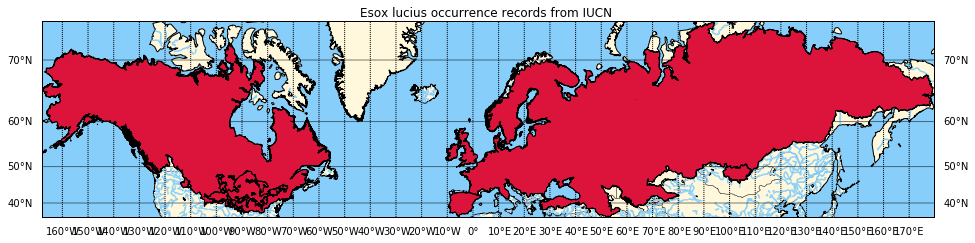

In [44]:
esox_lucius.plot_species_occurrence()

### One with the smallest area

In [45]:
non_extinct_fish.head(1).binomial

1396    Astatotilapia burtoni
Name: binomial, dtype: object

See all the records(areas) for this binomial

In [46]:
non_extinct_fish[non_extinct_fish.binomial=="Astatotilapia burtoni"]

,binomial,category,citation,class_name,compiler,dist_comm,family_nam,genus_name,geometry,id_no,...,presence,seasonal,shape_area,shape_leng,source,species_na,subpop,subspecies,tax_comm,year
1396,Astatotilapia burtoni,LC,IUCN (International Union for Conservation of ...,ACTINOPTERYGII,None,None,CICHLIDAE,Astatotilapia,POLYGON ((29.81538226200007 -5.175785492999978...,60462.0,...,1.0,0.0,0.000122,0.060842,None,burtoni,None,None,None,0.0
1397,Astatotilapia burtoni,LC,None,ACTINOPTERYGII,None,None,CICHLIDAE,Astatotilapia,(POLYGON ((29.30868665900005 -3.32325778499995...,60462.0,...,1.0,0.0,3.060698,24.027768,None,burtoni,None,None,None,0.0
1395,Astatotilapia burtoni,LC,IUCN (International Union for Conservation of ...,ACTINOPTERYGII,None,None,CICHLIDAE,Astatotilapia,(POLYGON ((29.03575778500004 -1.75451999299997...,60462.0,...,1.0,1.0,9.665142,66.983893,None,burtoni,None,None,None,0.0


In [47]:
astatotilapia_burtoni = IUCNSpecies(name_species="Astatotilapia burtoni")

In [48]:
astatotilapia_burtoni.set_data(non_extinct_fish[non_extinct_fish.binomial=="Astatotilapia burtoni"])

In [49]:
astatotilapia_burtoni.save_shapefile("../data/fish/selection/astatotilapia_burtoni")

Saved data: ../data/fish/selection/astatotilapia_burtoni 


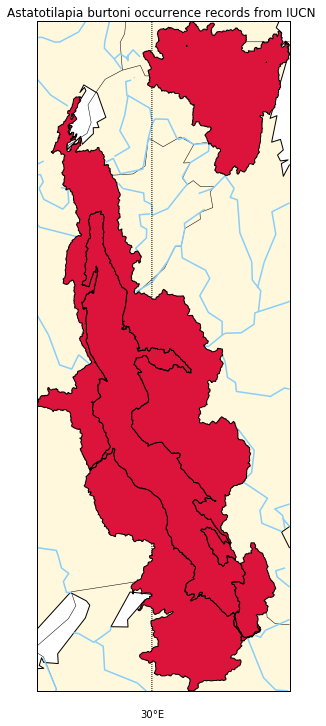

In [50]:
astatotilapia_burtoni.plot_species_occurrence()

This below is just another way of saving the data, i.e., not in a shapefile (which produces multiple files in a separate folder), but a "pickled" data in a single file, compressed. It is usually a lot faster than saving as a shape file, when there is big amounts of data to be saved.

In [51]:
astatotilapia_burtoni.save_data(dir_name="../data/fish/selection/")

Saved data: ../data/fish/selection/Astatotilapia burtoni0.pkl 
Type of data: <class 'geopandas.geodataframe.GeoDataFrame'> 


In [52]:
esox_lucius.save_data(dir_name="../data/fish/selection/")

Saved data: ../data/fish/selection/Esox lucius0.pkl 
Type of data: <class 'geopandas.geodataframe.GeoDataFrame'> 


Since the records are individual shapes, and there could be multiple per species (binomial), let's group them
by the species name, and apply a sum on the shape_area column. This will give us the total area (sum of all polygons) per-species. We want this in order to decide what our "average" species selection will be, for testing the workflow.

In [67]:
species_area_sum = non_extinct_fish.groupby('binomial')['shape_area'].apply(np.sum)

In [68]:
species_area_sum.sort(inplace=True)

/home/daniela/anaconda/envs/biodiversity_py3/lib/python3.4/site-packages/ipykernel/__main__.py:1: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting
  if __name__ == '__main__':


In [120]:
species_area_sum.head(10)

binomial
Stiphodon oatea             0.001221
Pelasgus epiroticus         0.002123
Salvelinus willoughbii      0.002167
Alosa killarnensis          0.002775
Coregonus danneri           0.002878
Stiphodon discotorquatus    0.003033
Salmo nigripinnis           0.003221
Salvelinus grayi            0.003221
Salmo stomachicus           0.003221
Sicyopterus rapa            0.003951
Name: shape_area, dtype: float64

In [121]:
species_area_sum.tail(10)

binomial
Rutilus rutilus         2997.839782
Hypomesus olidus        2999.564823
Gymnocephalus cernua    3057.031980
Cottus confusus         3060.971058
Perca fluviatilis       3422.239269
Phoxinus phoxinus       3521.155232
Pungitius pungitius     3580.720794
Thymallus arcticus      3663.143778
Lota lota               4761.657697
Esox lucius             5449.634304
Name: shape_area, dtype: float64

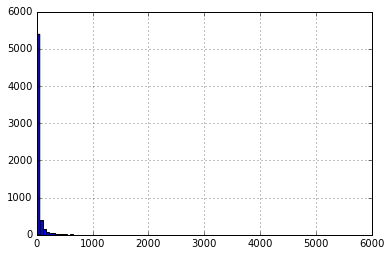

In [98]:
species_area_sum.hist(bins=100)

The distribution of areas (in km^2?) is exponential. The median value is rather low:

In [102]:
species_area_sum.median()

4.7331569142105

In [103]:
np.average(species_area_sum)

45.468180277109752

In [119]:
species_area_sum[(species_area_sum>45) & (species_area_sum<46)]

binomial
Lamprologus mocquardi         45.189511
Barbus guirali                45.277015
Mystus tengara                45.286891
Neolissochilus blanci         45.312671
Barbus wurtzi                 45.349153
Puntius brevis                45.410566
Acrocheilus alutaceus         45.433999
Clupeonella caspia            45.471927
Sicyopterus micrurus          45.491403
Stenogobius ophthalmoporus    45.508970
Belodontichthys truncatus     45.561695
Rita sacerdotum               45.578529
Parioglossus rainfordi        45.623731
Cyclocheilichthys enoplos     45.729648
Cyprinion semiplotum          45.878343
Name: shape_area, dtype: float64

### This below is an interesting "average case" with 3 regions, two of which are rather small. It also has a region extenting all the way into sea/ocean water

In [124]:
non_extinct_fish[non_extinct_fish.binomial=="Acrocheilus alutaceus"]

,binomial,category,citation,class_name,compiler,dist_comm,family_nam,genus_name,geometry,id_no,...,presence,seasonal,shape_area,shape_leng,source,species_na,subpop,subspecies,tax_comm,year
10322,Acrocheilus alutaceus,LC,None,ACTINOPTERYGII,None,None,CYPRINIDAE,Acrocheilus,"(POLYGON ((-118.533976237 49.08130154100007, -...",201940.0,...,1.0,0.0,0.361865,4.537151,None,alutaceus,None,None,None,0.0
10320,Acrocheilus alutaceus,LC,None,ACTINOPTERYGII,None,None,CYPRINIDAE,Acrocheilus,"(POLYGON ((-120.529733955 51.43137715600005, -...",201940.0,...,1.0,1.0,8.364796,37.046891,None,alutaceus,None,None,None,0.0
10321,Acrocheilus alutaceus,LC,NatureServe,ACTINOPTERYGII,"Freshwater Biodiversity Unit, IUCN",None,CYPRINIDAE,Acrocheilus,"(POLYGON ((-124.042233954 46.28038160500006, -...",201940.0,...,1.0,0.0,36.707338,70.318100,Digital Distribution Maps of the Freshwater Fi...,alutaceus,None,None,None,2013.0


In [125]:
acrocheilus_alutaceus = IUCNSpecies(name_species="Acrocheilus alutaceus")

In [126]:
acrocheilus_alutaceus.set_data(non_extinct_fish[non_extinct_fish.binomial=="Acrocheilus alutaceus"])

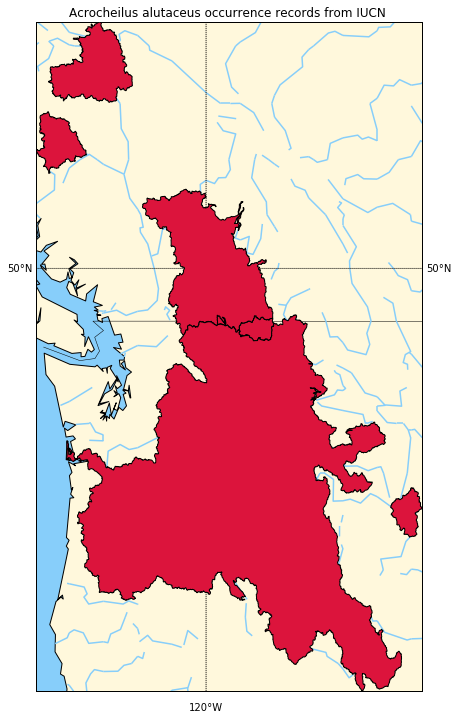

In [127]:
acrocheilus_alutaceus.plot_species_occurrence()

In [151]:
acrocheilus_alutaceus.save_data(dir_name="../data/fish/selection/")

Saved data: ../data/fish/selection/Acrocheilus alutaceus0.pkl 
Type of data: <class 'geopandas.geodataframe.GeoDataFrame'> 


In [152]:
acrocheilus_alutaceus.save_shapefile("../data/fish/selection/acrocheilus_alutaceus")

Saved data: ../data/fish/selection/acrocheilus_alutaceus 


The individual polygons are below. They are also "not valid" geometries, makes them interesting for case study.

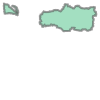

In [148]:
non_extinct_fish.loc[10322].geometry

Ring Self-intersection at or near point -124.46249999999998 53.175000000000068
Ring Self-intersection at or near point -124.46249999999998 53.175000000000068


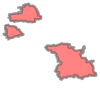

In [149]:
non_extinct_fish.loc[10320].geometry

Ring Self-intersection at or near point -123.34583333399996 45.416666666000026
Ring Self-intersection at or near point -123.34583333399996 45.416666666000026


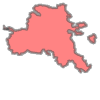

In [150]:
non_extinct_fish.loc[10321].geometry

In [155]:
non_extinct_binomials = non_extinct_fish.binomial.unique().tolist()

In [205]:
pickle.dump(non_extinct_binomials, open("../data/fish/selection/non_extinct_binomials.pkl","wb"))

In [221]:
non_extinct_binomials.index("Schistura kangjupkhulensis")

465